# Convolutional, LSTM Deep Neural Network

### In this notebook I will be training a Deep Neural Network for Language Classification.

##### A Recurrent Neural Network works best for Text Data, but since we have to just classify the label and not predict words such as in Language Translational tasks, we don't need to store all the temporal and spatial information

##### Hence for this task I'll be using a combination of Convolutional and LSTM Networks.

The CNN would work great for storing the temporal information in the test, since I'll be using a filter size of 5 which will keep track of 5 words at a time.

This information would be fed forward to the LSTM network which would in turn decide the weights for which information to be kept for deciding the language labels and which ones to be discarded.

We will have to find a golden mean for deciding the number of hidden layers for both CNN and LSTM, both should not weight out each other rather than complimenting.

##### Importing Basic Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

#### Importing Preprocessing and ML Libraries

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

C:\Users\redam\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##### Importing Dataframe

In [3]:
df = pd.read_csv('./lang_label/europarl.csv')

##### Data Pre-Processing

In [6]:
lang_label = np.array(['bg','cs','da','de','el','en','es','et','fi','fr','hu','it','lt','lv','nl','pl','pt','ro','sk','sl','sv'])

In [7]:
vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(df['text'])

In [9]:
sequences = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(sequences, maxlen=1000)

In [10]:
y = df.label.values

In [11]:
lb = preprocessing.LabelBinarizer()
lb.fit(lang_label)
y = lb.transform(y)

##### Train-Validation Split

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state=1234)

##### Model Building

In [14]:
model_conv = Sequential()
model_conv.add(Embedding(vocabulary_size, 100, input_length=1000))
model_conv.add(Dropout(0.5))
model_conv.add(Conv1D(128, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=4))
model_conv.add(LSTM(100))
model_conv.add(Dense(21, activation='sigmoid'))
model_conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 100)         2000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 128)          64128     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 249, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_1 (Dense)              (None, 21)                2121      
Total params: 2,157,849
Trainable params: 2,157,849
Non-trainable params: 0
_________________________________________________________________


##### Model Fitting

In [20]:
model_conv.fit(X_train, y_train, batch_size=128, epochs = 1, validation_data=[X_valid,y_valid])

Train on 168358 samples, validate on 18707 samples
Epoch 1/1
168358/168358 [==============================] - 4260s 25ms/step - loss: 0.4099 - acc: 0.8858 - val_loss: 0.1957 - val_acc: 0.9408


In [22]:
model_conv.fit(X_train, y_train, batch_size=128, epochs = 1, validation_data=[X_valid,y_valid])

Train on 168358 samples, validate on 18707 samples
Epoch 1/1
168358/168358 [==============================] - 4308s 26ms/step - loss: 0.1864 - acc: 0.9414 - val_loss: 0.1778 - val_acc: 0.9427


In [24]:
model_conv.fit(X_train, y_train, batch_size=128, epochs = 1, validation_data=[X_valid,y_valid])

Train on 168358 samples, validate on 18707 samples
Epoch 1/1
168358/168358 [==============================] - 4317s 26ms/step - loss: 0.1712 - acc: 0.9437 - val_loss: 0.1748 - val_acc: 0.9433


**In three epochs we are getting a very good accuracy on our validation set. Training more would result in over-fitting**

### Model Testing

##### Getting in Test Data

In [17]:
test_df = pd.read_csv('./test/europarl_test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20828 entries, 0 to 20827
Data columns (total 2 columns):
text     20828 non-null object
label    20828 non-null object
dtypes: object(2)
memory usage: 325.5+ KB


In [39]:
X_test = test_df.text.values
y_test = test_df.label.values
y_test = lb.transform(y_test)

In [40]:
sequences_test = tokenizer.texts_to_sequences(test_df['text'])
X_test = pad_sequences(sequences_test, maxlen=1000)

##### Model Evaluation

In [53]:
model_conv.evaluate(X_test,y_test)

20828/20828 [==============================] - 132s 6ms/step


[0.1547729262931636, 0.9602458229306703]

In [54]:
acc = model_conv.evaluate(X_test,y_test)[1]

In [55]:
print('Test Accuracy:', acc*100)

Test Accuracy: 96.02458229306703


##### Saving Predictions

In [56]:
y_test_pred = model_conv.predict(X_test)

##### Plotting Confusion Matrix

In [57]:
y_test = test_df.label.values
y_test = lb.transform(y_test)
y_test = np.argmax(y_test, axis=1)

In [58]:
y_pred = np.argmax(y_test_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float')/cm.sum(axis=1)

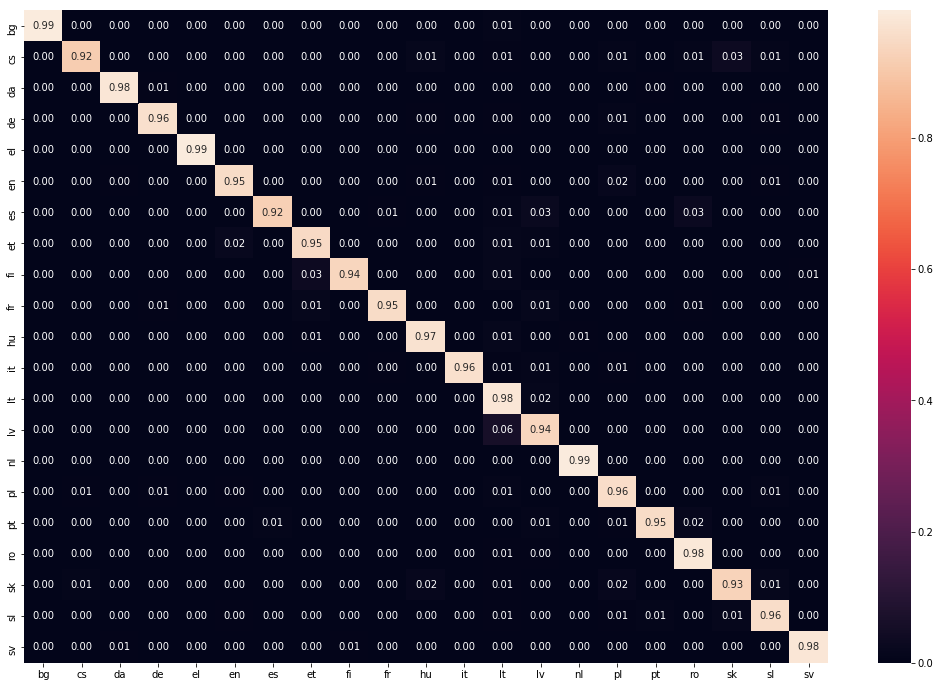

In [59]:
plt.figure(figsize = (18,12))
sns.heatmap(cm_norm, annot=True, fmt=".2f", xticklabels=lang_label, yticklabels=lang_label)

![](https://image.slidesharecdn.com/shorttextlanguagedetection-120515224804-phpapp02/95/short-text-language-detection-with-infinitygram-14-728.jpg?cb=1337122142?raw=true)

##### As seen from the above diagram we can see that the State of the Art Results we get a 99% accuracy.
##### But this particular model uses an Infinity-Gram bindings, which will take lot of time to train and while testing.

#### Our Model can be used in a Multi Language Translation Models, to detect the language so that it would be easier for the Model to Translate.

Since the Model doesn't take much time to predict labels it would be a better choice when using Language Translational Models at the output of this Model.

Possible changes which can be done to the current model can be using N-grams(bigrams and trigrams) and using a Deeper Neural Network but for that particular task we will have to find a Golden Medium for the complexity of CNN and LSTMS.